# FC calculation script
The input file is in `.h5` format. 

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
filename = "C:/Users/wayne/Downloads/test.h5"
labels = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
with h5py.File(filename, "r") as f:
    a_group_key = list(f.keys())[0]

    # Get the data
    data = np.array(list(f[a_group_key]))


real_data = pd.DataFrame(data[:,:,0,0], columns = labels, index = labels)
mask = np.triu(real_data)
sns.heatmap(real_data, mask = mask)

In [ ]:
contain = np.empty(120, dtype=float)
ind = np.empty(120, dtype=object)
pair_regions = np.tril(real_data, k=-1)
pr = pd.DataFrame(pair_regions, columns=labels, index=labels)
z = 0
for i in range(1,16,1):
    for j in range(i):
        if pr.iloc[i,j] != 0:
            contain[z] =  pr.iloc[i,j]
            ind[z] = labels[i] + "&" + labels[j]
            z += 1
pv = pd.DataFrame(data = contain.T, index = ind.T, columns = ["FC_value"])
# pv["Rank"] = pv["FC_value"].rank()
pv.sort_values("FC_value", inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(pv)

In [2]:
filename = '/mnt/c/Users/wayne/Desktop/Functional TS/Region_Labels_90ROIs.txt'
list_ = open(filename).read().split()
region = list_[1::2]

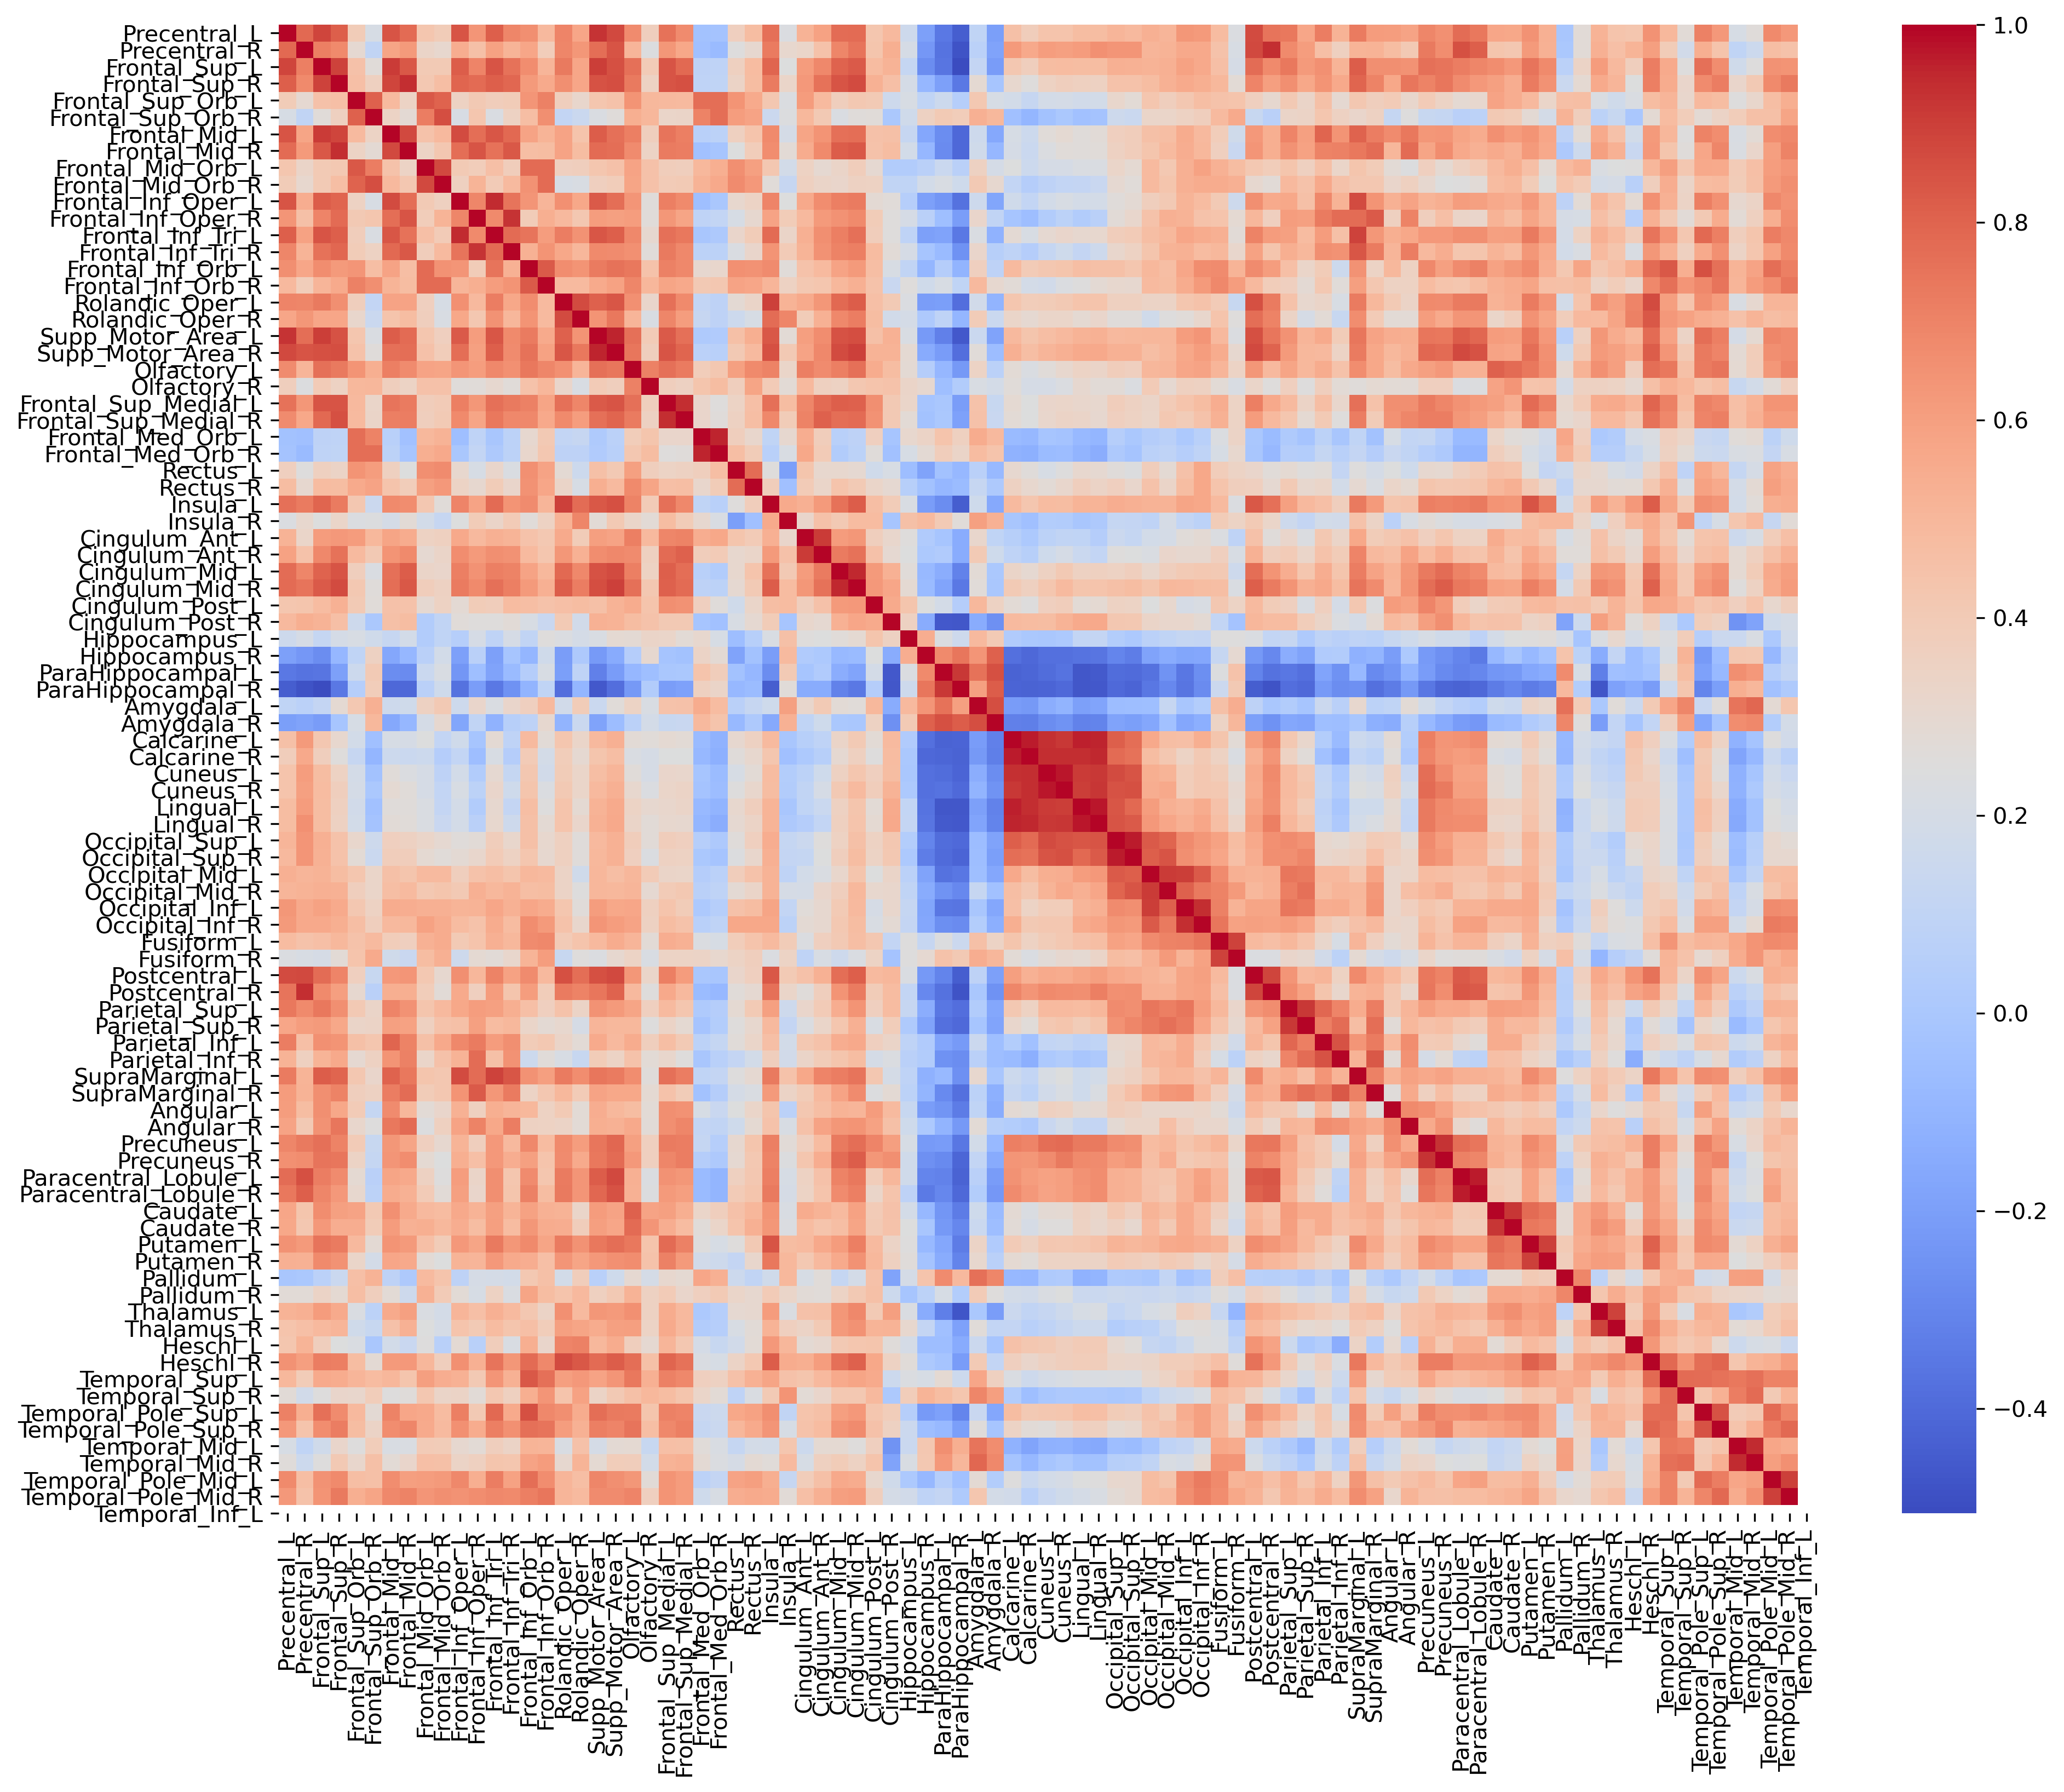

In [4]:
import scipy.io
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
mat = scipy.io.loadmat('/mnt/c/Users/wayne/Desktop/Functional TS/ROISignals_0302A.mat')
all = mat['ROISignals']

# fc = np.ones((88,88))
# for i in range(88):
#     for j in range(88):
#         fc[i,j] = np.corrcoef(all[:,i], all[:,j])

df = pd.DataFrame(all, columns = range(88))
fc = df.corr(method='pearson')

fig = plt.figure(figsize=(15,12),dpi = 300)
axes = fig.add_subplot(111)
sns.heatmap(pd.DataFrame(fc), cmap = "coolwarm", annot=False, ax = axes)
# sns.heatmap(pd.DataFrame(fc), cmap = "coolwarm", annot=False, ax = axes, xticklabels=region[:89], yticklabels=region[:89])

plt.show()